# QUESTÃO 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('match_results.csv')
df

,id,season,stage,date,home_team_goal,away_team_goal,home_team_name,away_team_name
0,1,2008/2009,1,2008-08-17 00:00:00,1,1,KRC Genk,Beerschot AC
1,2,2008/2009,1,2008-08-16 00:00:00,0,0,SV Zulte-Waregem,Sporting Lokeren
2,3,2008/2009,1,2008-08-16 00:00:00,0,3,KSV Cercle Brugge,RSC Anderlecht
3,4,2008/2009,1,2008-08-17 00:00:00,5,0,KAA Gent,RAEC Mons
4,5,2008/2009,1,2008-08-16 00:00:00,1,3,FCV Dender EH,Standard de Liège
...,...,...,...,...,...,...,...,...
25974,25975,2015/2016,9,2015-09-22 00:00:00,1,0,FC St. Gallen,FC Thun
25975,25976,2015/2016,9,2015-09-23 00:00:00,1,2,FC Vaduz,FC Luzern
25976,25977,2015/2016,9,2015-09-23 00:00:00,2,0,Grasshopper Club Zürich,FC Sion
25977,25978,2015/2016,9,2015-09-22 00:00:00,0,0,Lugano,FC Zürich


**H0**: EXISTE IMPACTO SIGNIFICATIVO DE JOGAR EM CASA (>70%)

**H1**: NÃO EXISTE IMPACTO SIGNIFICATIVO DE JOGAR EM CASA (<70%)

In [3]:
#NÍVEL DE SIGNIFICÂNCIA
α = 0.05

In [4]:
conditions = [df['home_team_goal']>df['away_team_goal'],df['home_team_goal']<=df['away_team_goal']]
choices = [1,0]

df['home_team_wins'] = np.select(conditions,choices)
df

,id,season,stage,date,home_team_goal,away_team_goal,home_team_name,away_team_name,home_team_wins
0,1,2008/2009,1,2008-08-17 00:00:00,1,1,KRC Genk,Beerschot AC,0
1,2,2008/2009,1,2008-08-16 00:00:00,0,0,SV Zulte-Waregem,Sporting Lokeren,0
2,3,2008/2009,1,2008-08-16 00:00:00,0,3,KSV Cercle Brugge,RSC Anderlecht,0
3,4,2008/2009,1,2008-08-17 00:00:00,5,0,KAA Gent,RAEC Mons,1
4,5,2008/2009,1,2008-08-16 00:00:00,1,3,FCV Dender EH,Standard de Liège,0
...,...,...,...,...,...,...,...,...,...
25974,25975,2015/2016,9,2015-09-22 00:00:00,1,0,FC St. Gallen,FC Thun,1
25975,25976,2015/2016,9,2015-09-23 00:00:00,1,2,FC Vaduz,FC Luzern,0
25976,25977,2015/2016,9,2015-09-23 00:00:00,2,0,Grasshopper Club Zürich,FC Sion,1
25977,25978,2015/2016,9,2015-09-22 00:00:00,0,0,Lugano,FC Zürich,0


In [5]:
N = len(df)
sample = sum(df['home_team_wins'])/N
reported = 0.3

sigma = np.sqrt(reported*(1-reported)/100)
sigma

0.0458257569495584

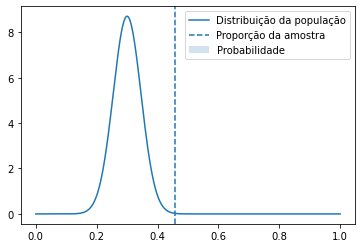

In [6]:
xs = np.linspace(0,1,500)
ps = stats.norm.pdf(xs,reported,sigma)

plt.plot(xs,ps,label='Distribuição da população')
plt.axvline(sample,ls='--',label='Proporção da amostra')
plt.fill_between(xs,ps,0,alpha=0.2,where=xs>=sample,label='Probabilidade')
plt.legend();

In [7]:
prob_nule_true = stats.norm.sf(sample,reported,sigma)
prob_nule_true

0.00026661675286281686

In [8]:
z_score = (sample-reported)/sigma
z_score_needed_for_significance = stats.norm.ppf(1-α)
print(z_score)
print(z_score_needed_for_significance)
print(f'O p-valor é {stats.norm.sf(sample,reported,sigma):.10f}')

3.463481376535153
1.6448536269514722
O p-valor é 0.0002666168


Logo, devemos **REJEITAR** a hipótese nula, ou seja, não existe impacto significante de jogar em casa